In [86]:
import numpy as np 
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

In [43]:
def generate_data(size): 
    data = np.zeros([size, 9])
    target = np.zeros(size)
    for i in range(size): 
        for j in range(9):
            data[i, j] = np.random.choice([0,1])
    
    for i in range(size): 
        target[i] = np.random.choice([0,1])
    return data, target

In [44]:
data, target  = generate_data(120)

In [45]:
experts = [] 
weights = [] 

def createExpert(): 
    expert = BernoulliNB() 
    experts.append(expert)
    weights.append(1)
    

In [46]:
def remove_expert(theta): 
    mask = weights > theta 
    experts = experts[mask]
    weights = weights[mask]
    

In [47]:
def scale_weights(): 
    max_weight = max(weigths) 
    for weight in weights: 
        weight = weight* (1/max_weight)

In [48]:
def predict_with_expert(expert, sample, first_run):
    if first_run:
        return np.random.choice([1,0])
    else:
        return int(expert.predict([sample]))
    

In [62]:
def dwm(X,y, beta, theta, period): 
    createExpert() 
    first_run = True 
    m = 1 
    predictions = np.zeros(len(np.unique(y)))
    nb_acc = [] 
    dwm_acc = [] 
    nb = BernoulliNB()
    for i in range(len(X)): 
        for j in range(m): 
            pred = predict_with_expert(experts[j],X[i], first_run)
            if(pred != y[i] and i% period == 0):
                weights[j] = weights[j]*beta
            
            predictions[pred] = predictions[pred] + weights[j]
            
        pred = np.array([np.argmax(predictions)])
         
        if i % period == 0: 
            m = m+1
            createExpert()
        nb.partial_fit([X[i]], [y[i]], np.unique(y))
        preds = nb.predict(X)
        nb_acc.append(accuracy_score(preds, y))
        for ex in experts: 
            ex.partial_fit([X[i]], [y[i]], np.unique(y))
            first_run = False
        dwm_preds = predict(X) 
        dwm_acc.append(accuracy_score(dwm_preds, y))
    
    return dwm_acc, nb_acc

In [58]:
def predict(sample): 
    preds = np.array([np.array(experts[j].predict(sample)) * weights[j]
                              for j in range(len(experts))])
    sum_weights = sum(weights[j] for j in range(len(weights)))
    aggregate = np.sum(preds / sum_weights, axis=0)
    
    return (aggregate + 0.5).astype(int)
    

In [78]:
reset()

In [79]:
dwm_accs, nb_accs = dwm(data, target, 0.1, 0.01, 6 )

C:\Users\RAMIL\Anaconda3\ramil\lib\site-packages\sklearn\naive_bayes.py:461: RuntimeWarning: divide by zero encountered in log
  self.class_log_prior_ = (np.log(self.class_count_) -


In [80]:
x_test, y_test = generate_data(10)

In [81]:
preds = predict(x_test)

In [88]:
def reset():
    experts = []
    weights = []

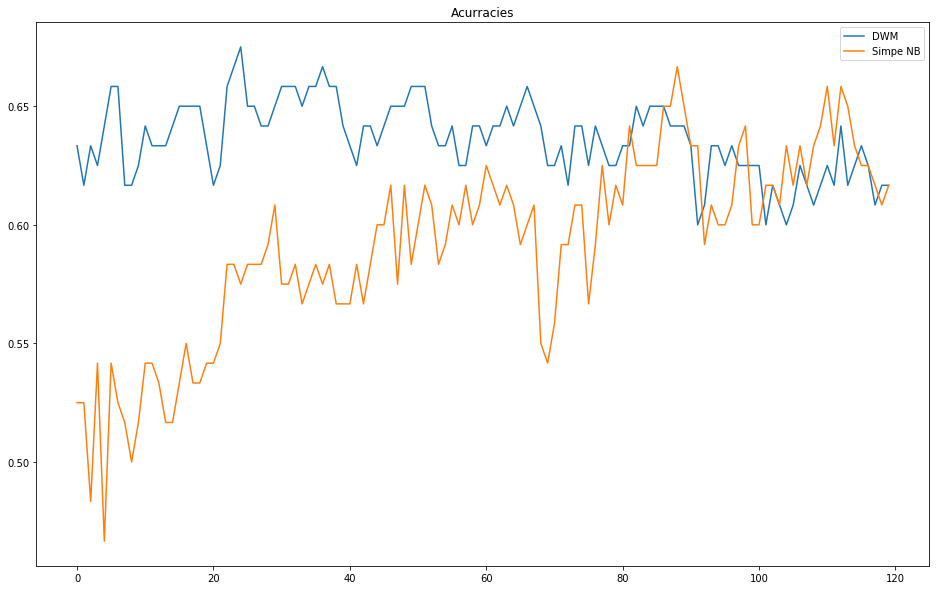

In [77]:

plt.figure(1, figsize=(16,10))
plt.title("Acurracies")
plt.plot(np.arange(len(dwm_accs)), dwm_accs, label="DWM")
plt.legend()

plt.title("Acurracies")
plt.plot(np.arange(len(nb_accs)), nb_accs, label="Simpe NB")
plt.legend()
plt.show()
